# Building Reliable Single AI Agents with Azure AI Agent Service

### **So, What is an Agent?**

When asked, "What is an agent?" you might hear, "James Bond, of course!" or even, "An entire team of secret agents!" In our realm, however, an agent isn’t a spy—it’s an **autonomous computational entity** powered by foundational models (like LLMs or SLMs). Think of it as a digital 007 that observes, plans, and acts based on its environment.

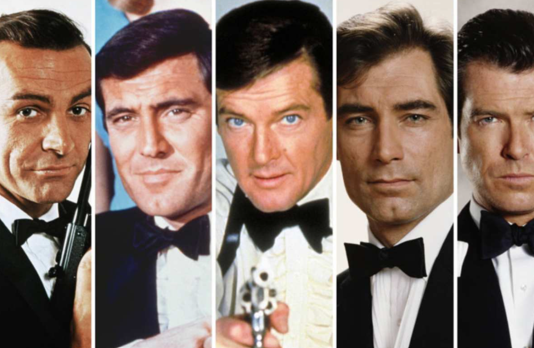

### **The AI Agent – A New Breed of Intelligence**

In my view, the best way to describe an AI agent is through the lens of a *Generative Agent*. Researchers at Stanford pioneered this concept by creating AI entities that mimic human-like behavior in simulated environments. Drawing on the paper [*"Generative Agents: Interactive Simulacra of Human Behavior"* by Joon Sung Park, Joseph C. O'Brien, and colleagues](https://arxiv.org/abs/2304.03442) (definitely worth a read!), these agents are much more than simple bots. They wake up, make breakfast, form friendships, and even throw parties. Just as James Bond recalls past missions to shape his next move, generative agents retain "memories" of their experiences to make nuanced, contextually aware decisions.

These agents don’t simply react—they **reflect, strategize, and plan**. Stanford’s approach involves crafting an architecture where agents remember past interactions, consolidate them into reflections, and dynamically retrieve relevant memories to guide future behavior. Picture each AI agent as a unique character in a bustling digital town, complete with quirks, ambitions, and social lives. With observation, planning, and reflection at their core, these generative agents go beyond automation to create simulations that feel truly human.

### **Understanding The Anatomy of an Agent: Ordering Pizza with a Twist (007 Style)**

Even James Bond, 007, needs to eat. When hunger strikes, he decides on pizza. Here’s how his process mirrors an AI agent’s workflow:

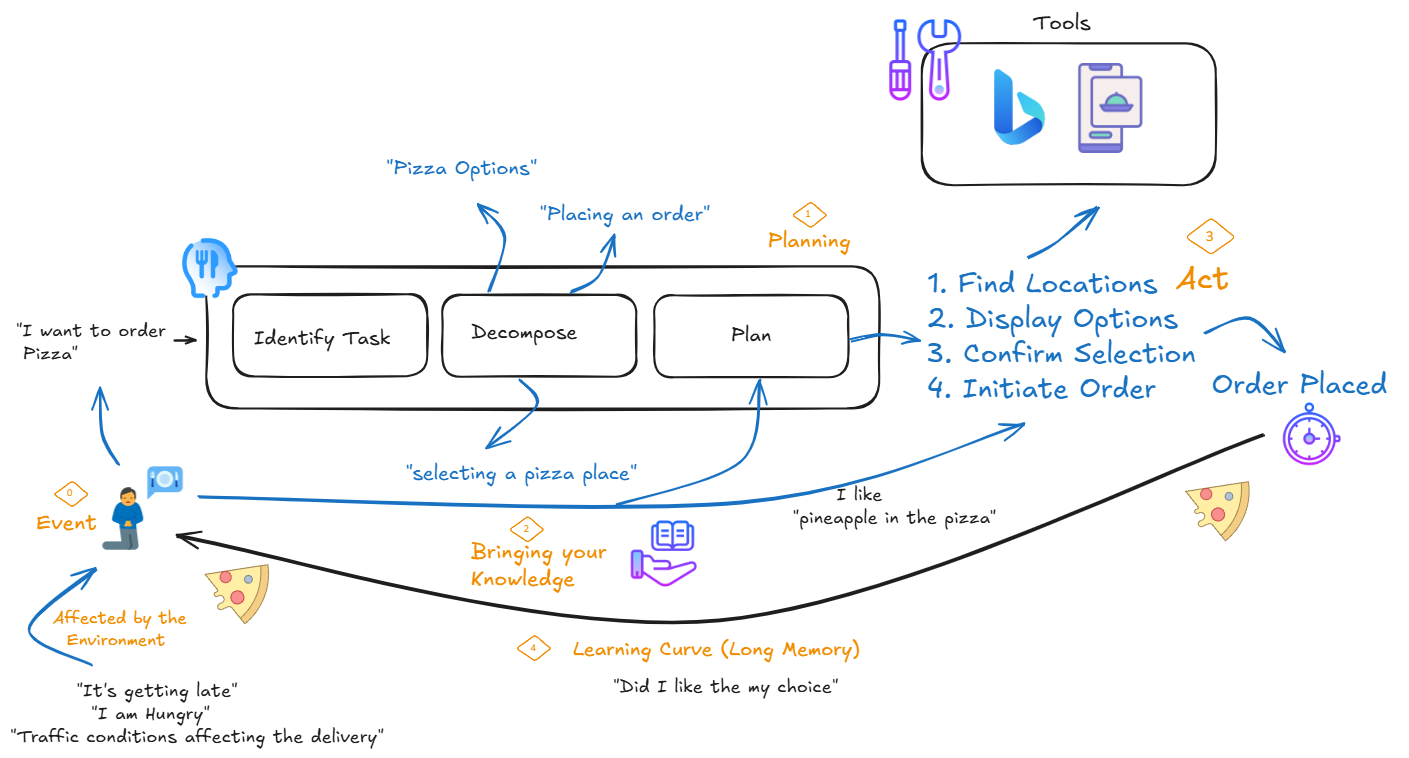

- **Perception: Understanding the Problem**  
  Bond realizes it’s late and that he needs food—quickly. Factors like traffic, time, and his current location shape his decision. Similarly, an AI agent begins by taking in external data (such as traffic conditions, user preferences, and time constraints) to clearly define the problem.

- **Decomposition: Breaking Down the Problem**  
  Next, Bond identifies the steps: finding nearby pizzerias, choosing the best option, and arranging delivery. Likewise, an AI agent breaks the problem into actionable tasks—searching for restaurants, filtering by criteria (e.g., delivery speed), and placing an order.

- **Planning: Formulating a Strategy**  
  Bond carefully weighs his options—speed versus quality—and selects the best pizzeria based on reputation. Similarly, AI agents evaluate constraints and user preferences to determine an optimal plan.

- **Tool Utilization: Using Resources**  
  Bond leverages his gadgets—perhaps a smartwatch or an app—to check menus and place his order. AI agents use tools like APIs, external databases, or recommendation engines to gather and process information.

- **Action: Executing the Plan**  
  With a plan in place, Bond places his order and waits for confirmation. The AI agent, in parallel, executes the task by sending requests, tracking progress, and updating systems.

- **Feedback and Reflection: Evaluating the Outcome**  
  Once the pizza arrives, Bond assesses whether it was on time and met his expectations. Similarly, AI agents review outcomes, measuring success against predefined criteria and learning from each experience.

- **Memory: Retaining Lessons Learned**  
  Bond stores his experience for future reference—both as a short-term update and as a long-term memory. Likewise, AI agents update their memory to improve performance over time, ensuring smarter decision-making in future tasks.


#### **Let's define the Foundational Architecture of a Single AI Agent**

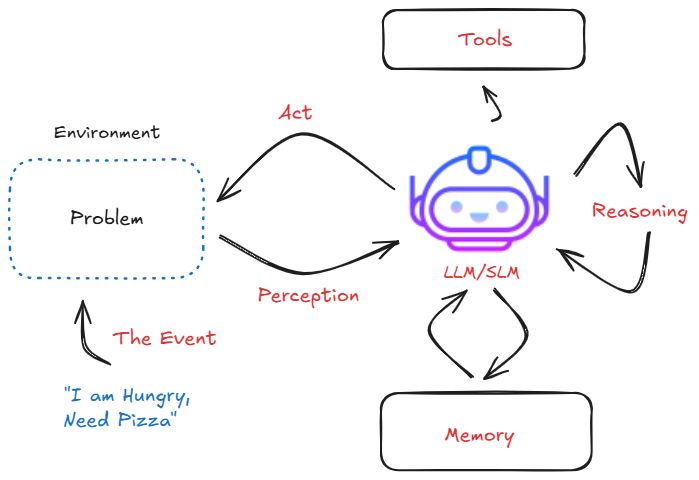

1. **Perception:** The agent processes external inputs (e.g., "I am hungry, need pizza") to understand the task and its context.
2. **Reasoning:** Utilizing LLMs or SLMs, the agent interprets input, evaluates options, and formulates a strategy.
3. **Memory:** The agent accesses and updates memory to leverage past interactions, ensuring adaptive decision-making.
4. **Tools:** External resources (APIs, databases, applications) are used to perform specific operations—like finding a pizza place or calculating delivery times.
5. **Action:** The agent executes the planned task, translating reasoning into tangible outputs, such as placing orders or delivering updates.


### Building Reliable Single AI Agents with Azure AI Agent Service

Azure AI Agent Service makes it simple to create and deploy intelligent, secure, and scalable AI agents without managing the underlying infrastructure. This fully managed platform streamlines every step—from initializing agents as microservices to automatically invoking the right tools based on user input. By handling conversation state, logging every interaction, and integrating with over 1,400 connectors (such as Logic Apps and Azure Functions), it frees you to focus on designing smart workflows.

The service also grounds agent responses with real-time data from sources like Bing and SharePoint, while offering flexibility with multiple language models (including GPTs, Meta and Llama) and support for various data types. Security is built in, with features such as BYO storage and keyless authentication ensuring enterprise-grade protection.

**In short, Azure AI Agent Service empowers you to build reliable single-agent systems quickly and efficiently, serving as the foundation for more complex, multi-agent solutions—all while reducing development complexity and ensuring robust performance.**

So, let's go ahead and create an agent with Azure AI Agent Service!

In [1]:
"""
DESCRIPTION:
    This sample Notebook demonstrates how to create single agents using Azure AI Agent Service with a toolset. 
    It utilizes the Azure AI Foundry Python SDK to interact with the service.

USAGE:

    Before running the Notebook, install the required packages by running:

    pip install -r requirements.txt

    Set these environment variables with your own values:

    1) PROJECT_CONNECTION_STRING - The project connection string, as found in the overview page of your
       Azure AI Foundry project.
    2) MODEL_DEPLOYMENT_NAME - The deployment name of the AI model, as found under the "Name" column in 
       the "Models + endpoints" tab in your Azure AI Foundry project.
    3) BING_CONNECTION_NAME - The connection name if you are integrating external tools like Bing.
    4) AZURE_TRACING_GEN_AI_CONTENT_RECORDING_ENABLED - Set to true if you want to trace the content of chat messages.

    More information on how to set up your environment can be found in the 00-set-up-env file.

WHAT YOU'LL LEARN:
    By the end of this lab, you will:
    1) Understand how to create a basic agent and thread for conversation.
    2) Use tools (custom user functions or code interpreters) to extend agent capabilities.
    3) Implement streaming with an event handler for partial responses.
    4) Integrate with Azure Monitor for tracing and debugging.
    5) Generate and parse JSON schema outputs.
"""

'\nDESCRIPTION:\n    This sample Notebook demonstrates how to create single agents using Azure AI Agent Service with a toolset. \n    It utilizes the Azure AI Foundry Python SDK to interact with the service.\n\nUSAGE:\n\n    Before running the Notebook, install the required packages by running:\n\n    pip install -r requirements.txt\n\n    Set these environment variables with your own values:\n\n    1) PROJECT_CONNECTION_STRING - The project connection string, as found in the overview page of your\n       Azure AI Foundry project.\n    2) MODEL_DEPLOYMENT_NAME - The deployment name of the AI model, as found under the "Name" column in \n       the "Models + endpoints" tab in your Azure AI Foundry project.\n    3) BING_CONNECTION_NAME - The connection name if you are integrating external tools like Bing.\n    4) AZURE_TRACING_GEN_AI_CONTENT_RECORDING_ENABLED - Set to true if you want to trace the content of chat messages.\n\n    More information on how to set up your environment can be f

In [2]:
import os
import pprint

# Define the target directory
target_directory = r"C:\Users\pablosal\Desktop\gbbai-agent-architecture-lab"  # change your directory here

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")


Directory changed to C:\Users\pablosal\Desktop\gbbai-agent-architecture-lab


In [3]:
# Import necessary libraries
import os
from azure.identity import DefaultAzureCredential
from azure.ai.projects import AIProjectClient
from utils.ml_logging import get_logger

logger = get_logger()

# Set your connection string (replace with your actual connection string)
project_connection_string = os.getenv("AZURE_AI_FOUNDRY_CONNECTION_STRING")

# Create the project client
project = AIProjectClient.from_connection_string(
    conn_str=project_connection_string,
    credential=DefaultAzureCredential()
)

# Verify connection
logger.info("AI Foundry project client created successfully")

2025-02-09 14:55:36,134 - micro - MainProcess - INFO     AI Foundry project client created successfully (3305489847.py:<module>:19)


## Creating a Basic Agent & Thread

> Scenario: You want to set up an agent that can respond to user queries in a simple conversation. This is your “Hello World” for Azure Agents.

### Basic Agent Lifecycle: Create Agent → Create Thread → Send Message → Create & Poll Run
1. **Create an agent**  
2. **Create a thread**  
3. **Send a message** (from the user)  
4. **Create & poll a run** (to get the response)  
5. **List or logger.info all messages**  
6. **Clean up** (delete the agent)

In this section, we’ll walk through a minimal scenario to see how an agent interacts with a thread. The flow includes creating an agent, setting up a conversation (thread), sending a user message, polling for the response, and finally removing the agent once you’re done.

> Debuggin Note: Since Enterprise agents only support one Azure OpenAI connection, you'll need to ensure your project has only one such connection.

In [4]:
import os
import time
import json
from azure.ai.projects import AIProjectClient
from azure.identity import DefaultAzureCredential
from azure.ai.projects.models import MessageTextContent, MessageRole
from azure.core.exceptions import HttpResponseError

# 1. Set up the model name
deployment_name = os.environ.get("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID")

if not deployment_name:
    logger.error("Environment variable 'AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID' is not set.")
    exit(1)

# 2. Initialize the AI Project Client (Already Done in the first cell)

# 3. Create a basic agent
try:
    basic_agent = project.agents.create_agent(
        model=deployment_name,
        name="my-basic-agent",
        instructions="You are a friendly assistant who loves answering technology questions.",
        metadata={"owner": "IT Support"},
    )
    logger.info(f"Created Agent ID: {basic_agent.id}")
    logger.info(f"Agent Metadata: {basic_agent.metadata}")
except HttpResponseError as e:
    error_content = e.response.content
    try:
        error_json = json.loads(error_content)
        logger.error(f"Error Message: {error_json.get('Message')}")
    except json.JSONDecodeError:
        logger.error(f"Non-JSON Error Content: {error_content}")
    exit(1)

# 4. Create a thread (context for the conversation)
try:
    basic_thread = project.agents.create_thread()
    logger.info(f"Created Thread ID: {basic_thread.id}")
except Exception as e:
    logger.error(f"Failed to create thread: {e}")
    project.agents.delete_agent(basic_agent.id)
    exit(1)

# 5. Create a user message
try:
    user_message = project.agents.create_message(
        thread_id=basic_thread.id,
        role="user",
        content="Hey agent, can you tell me an interesting fact about Python?"
    )
    logger.info(f"User Message ID: {user_message.id}")
except Exception as e:
    logger.error(f"Failed to create user message: {e}")
    project.agents.delete_agent(basic_agent.id)
    exit(1)

# 6. Create a run to process the conversation
try:
    run = project.agents.create_run(thread_id=basic_thread.id, assistant_id=basic_agent.id)
    logger.info("Run created. Polling for status...")
except Exception as e:
    logger.error(f"Failed to create run: {e}")
    project.agents.delete_agent(basic_agent.id)
    exit(1)

# 7. Poll until run completes or fails
try:
    while run.status in ["queued", "in_progress", "requires_action"]:
        time.sleep(1)
        run = project.agents.get_run(thread_id=basic_thread.id, run_id=run.id)
        logger.info(f"Current run status: {run.status}")
except Exception as e:
    logger.error(f"Error while polling run status: {e}")
    project.agents.delete_agent(basic_agent.id)
    exit(1)

# 8. Retrieve and display messages
try:
    conversation_history = project.agents.list_messages(thread_id=basic_thread.id)
    logger.info("\n----- Conversation History -----")
    for msg in reversed(conversation_history.data):
        if len(msg.content) and isinstance(msg.content[-1], MessageTextContent):
            # Corrected logging statement
            logger.info(f"{msg.role.upper()}: {msg.content[-1].text.value}")
except Exception as e:
    logger.error(f"Failed to retrieve conversation history: {e}")

# 9. Cleanup
try:
    project.agents.delete_agent(basic_agent.id)
    logger.info(f"Deleted agent with ID: {basic_agent.id}")
except Exception as e:
    logger.error(f"Failed to delete agent: {e}")


2025-02-09 14:55:40,590 - micro - MainProcess - INFO     Created Agent ID: asst_vVJXT5Hj65Tf6jBOOZnNs7M9 (3267616241.py:<module>:26)
2025-02-09 14:55:40,591 - micro - MainProcess - INFO     Agent Metadata: {'owner': 'IT Support'} (3267616241.py:<module>:27)
2025-02-09 14:55:41,902 - micro - MainProcess - INFO     Created Thread ID: thread_lqjCzxk9oKo00QWmqanS3Eyb (3267616241.py:<module>:40)
2025-02-09 14:55:43,421 - micro - MainProcess - INFO     User Message ID: msg_c4Ig88GHPdkING8riMSqf9vY (3267616241.py:<module>:53)
2025-02-09 14:55:45,124 - micro - MainProcess - INFO     Run created. Polling for status... (3267616241.py:<module>:62)
2025-02-09 14:55:46,735 - micro - MainProcess - INFO     Current run status: completed (3267616241.py:<module>:73)
2025-02-09 14:55:47,283 - micro - MainProcess - INFO     
----- Conversation History ----- (3267616241.py:<module>:82)
2025-02-09 14:55:47,284 - micro - MainProcess - INFO     USER: Hey agent, can you tell me an interesting fact about Pytho

## Adding Tools and Custom User Functions

> Scenario: We want the agent to call Python functions to perform tasks like getting the current local time, summing numbers, or retrieving mock weather data. We wrap these Python functions in a FunctionTool, then attach them to the agent as part of a ToolSet.

In [5]:
import os
from azure.ai.projects.models import FunctionTool, ToolSet, MessageTextContent
from src.tools.lab_user_functions import (
    get_local_time,
    get_mock_weather,
    add_numbers,
    dispatch_email,
)

In [6]:
from azure.ai.projects.models import FunctionTool, ToolSet, MessageTextContent

# 1. Create a FunctionTool with custom functions
functions_tool = FunctionTool({
    get_local_time,
    get_mock_weather,
    add_numbers,
    dispatch_email,
})
logger.info("FunctionTool with custom functions created.")

# 2. Create a ToolSet and add the FunctionTool
my_toolset = ToolSet()
my_toolset.add(functions_tool)
logger.info("ToolSet created and FunctionTool added.")

# 3. Create an agent with the ToolSet
try:
    agent_with_tools = project.agents.create_agent(
        model=deployment_name,
        name="agent-with-tools",
        instructions="You are an advanced assistant capable of calling user-defined functions when necessary.",
        toolset=my_toolset
    )
    logger.info(f"Created Agent with Tools: {agent_with_tools.id}")
except HttpResponseError as e:
    logger.error(f"Failed to create agent: {e}")

# 4. Create a conversation thread
try:
    tool_thread = project.agents.create_thread()
    logger.info(f"Created Thread: {tool_thread.id}")
except HttpResponseError as e:
    logger.error(f"Failed to create thread: {e}")
    project.agents.delete_agent(agent_with_tools.id)

# 5. Create a user message requesting function usage
try:
    user_msg = project.agents.create_message(
        thread_id=tool_thread.id,
        role=MessageRole.USER,  # Use enum for roles
        content="Hi there, please tell me the local time, then add 40 and 2, and send me the result in an email!"
    )
    logger.info(f"Created user message ID: {user_msg.id}")
except HttpResponseError as e:
    logger.error(f"Failed to create user message: {e}")
    project.agents.delete_agent(agent_with_tools.id)

# 6. Create and process the run (combines creation + processing)
try:
    tool_run = project.agents.create_and_process_run(
        thread_id=tool_thread.id,
        assistant_id=agent_with_tools.id
    )
    logger.info(f"Run finished with status: {tool_run.status}")
except HttpResponseError as e:
    logger.error(f"Failed to create and process run: {e}")
    project.agents.delete_agent(agent_with_tools.id)

# 7. Check if the run failed
if tool_run.status == "failed":
    logger.error("Run failed. Check your function definitions or agent instructions.")
    project.agents.delete_agent(agent_with_tools.id)

# 8. Retrieve and display conversation messages
try:
    all_messages = project.agents.list_messages(thread_id=tool_thread.id)
    logger.info("\n----- Conversation with Tools -----")
    for msg in reversed(all_messages.data):
        if len(msg.content) and isinstance(msg.content[-1], MessageTextContent):
            # Properly format the log message
            logger.info(f"{msg.role.upper()}: {msg.content[-1].text.value}")
except HttpResponseError as e:
    logger.error(f"Failed to retrieve messages: {e}")

# 9. Cleanup: Delete the agent to free resources
try:
    project.agents.delete_agent(agent_with_tools.id)
    logger.info(f"Deleted agent with Tools: {agent_with_tools.id}")
except HttpResponseError as e:
    logger.error(f"Failed to delete agent: {e}")


2025-02-09 14:55:48,055 - micro - MainProcess - INFO     FunctionTool with custom functions created. (1388693284.py:<module>:10)
2025-02-09 14:55:48,057 - micro - MainProcess - INFO     ToolSet created and FunctionTool added. (1388693284.py:<module>:15)


2025-02-09 14:55:48,570 - micro - MainProcess - INFO     Created Agent with Tools: asst_Acbp0ZzT1QfqqE8gMTxb4mo4 (1388693284.py:<module>:25)
2025-02-09 14:55:49,243 - micro - MainProcess - INFO     Created Thread: thread_MiJbYmfPj0gaHr4S3i1BXfsM (1388693284.py:<module>:32)
2025-02-09 14:55:49,750 - micro - MainProcess - INFO     Created user message ID: msg_Ur9pxCi7eZBYyA8c7JA37Dex (1388693284.py:<module>:44)


Sending email to user@example.com with subject: Sum Result
Body:
The current local time is 2025-02-09 14:55:54. The sum of 40 and 2 is 42.


2025-02-09 14:55:59,934 - micro - MainProcess - INFO     Run finished with status: completed (1388693284.py:<module>:55)
INFO:micro:Run finished with status: completed
2025-02-09 14:56:00,402 - micro - MainProcess - INFO     
----- Conversation with Tools ----- (1388693284.py:<module>:68)
INFO:micro:
----- Conversation with Tools -----
2025-02-09 14:56:00,405 - micro - MainProcess - INFO     USER: Hi there, please tell me the local time, then add 40 and 2, and send me the result in an email! (1388693284.py:<module>:72)
INFO:micro:USER: Hi there, please tell me the local time, then add 40 and 2, and send me the result in an email!
2025-02-09 14:56:00,407 - micro - MainProcess - INFO     ASSISTANT: The current local time is 2025-02-09 14:55:54. The sum of 40 and 2 is 42. An email with this information has been dispatched to you. (1388693284.py:<module>:72)
INFO:micro:ASSISTANT: The current local time is 2025-02-09 14:55:54. The sum of 40 and 2 is 42. An email with this information has be

## Grounding with Bing (just another Tool)

We'll create both the FunctionTool with our custom functions and the BingGroundingTool. These tools will be added to a ToolSet, which will be associated with our agent.

> Scenario: We want the agent to perform tasks like getting the current local time, summing numbers, retrieving mock weather data, and leveraging Bing's search capabilities to provide accurate and up-to-date information. We wrap these functionalities in a FunctionTool and BingGroundingTool, then attach them to the agent as part of a ToolSet.

In [7]:
from azure.ai.projects.models import FunctionTool, ToolSet, BingGroundingTool, MessageTextContent
from src.tools.lab_user_functions import (
    get_local_time,
    get_mock_weather,
    add_numbers,
    dispatch_email,
)

def create_tools_with_bing(project_client: AIProjectClient, bing_connection_name: str) -> ToolSet:
    """Create and return a ToolSet containing FunctionTool and BingGroundingTool."""
    try:
        # Create FunctionTool with custom functions
        functions_tool = FunctionTool({
            get_local_time,
            get_mock_weather,
            add_numbers,
            dispatch_email,
        })
        logger.info("FunctionTool with custom functions created.")

        # Create Bing Grounding Tool
        try:
            bing_connection = project_client.connections.get(connection_name=bing_connection_name)
            conn_id = bing_connection.id
            logger.info(f"Bing Connection ID retrieved: {conn_id}")
        except HttpResponseError as e:
            logger.error(f"Failed to retrieve Bing connection: {e}")
            return None

        bing_tool = BingGroundingTool(connection_id=conn_id)
        logger.info("Bing Grounding Tool initialized.")

        # Create ToolSet and add both tools
        toolset = ToolSet()
        toolset.add(functions_tool)
        toolset.add(bing_tool)
        logger.info("ToolSet created and both tools added.")

        return toolset

    except Exception as e:
        logger.exception("Failed to create tools.")
        return None

In [8]:
from azure.core.exceptions import HttpResponseError
import os
import time

# 1. Create a FunctionTool with custom functions (Already handled in create_tools)

# 2. Create a ToolSet and add the FunctionTool + Bing Grounding Tool
bing_connection_name = os.environ.get("BING_CONNECTION_NAME")
if not bing_connection_name:
    logger.error("Environment variable 'BING_CONNECTION_NAME' is not set.")
    # Exit or handle the missing environment variable appropriately
    exit(1)

my_toolset = create_tools_with_bing(project, bing_connection_name)
if not my_toolset:
    logger.error("Failed to create ToolSet with FunctionTool and Bing Grounding Tool.")
    # Exit or handle the failure appropriately
    exit(1)

# 3. Create an agent with the ToolSet
try:
    agent_with_tools = project.agents.create_agent(
        model=deployment_name,
        name="agent-with-tools",
        instructions="You are an advanced assistant capable of calling user-defined functions and performing Bing searches when necessary.",
        toolset=my_toolset,
        headers={"x-ms-enable-preview": "true"}
    )
    logger.info(f"Created Agent with Tools: {agent_with_tools.id}")
except HttpResponseError as e:
    logger.error(f"Failed to create agent: {e}")
    # Exit or handle the failure appropriately
    exit(1)

# 4. Create a conversation thread
try:
    tool_thread = project.agents.create_thread()
    logger.info(f"Created Thread: {tool_thread.id}")
except HttpResponseError as e:
    logger.error(f"Failed to create thread: {e}")
    project.agents.delete_agent(agent_with_tools.id)
    exit(1)

# 5. Create a user message requesting function usage and Bing search
task=(
    "Hi there, please tell me the local time, then add 40 and 2, "
    "perform a Bing search on 'Euler's Identity', and send me the results in an email!"
)
try:
    user_msg = project.agents.create_message(
        thread_id=tool_thread.id,
        role=MessageRole.USER,  # Use enum for roles
        content=task
    )
    logger.info(f"Created user message ID: {user_msg.id}")
except HttpResponseError as e:
    logger.error(f"Failed to create user message: {e}")
    project.agents.delete_agent(agent_with_tools.id)
    exit(1)

# 6. Create and process the run (combines creation + processing)
try:
    tool_run = project.agents.create_and_process_run(
        thread_id=tool_thread.id,
        assistant_id=agent_with_tools.id
    )
    logger.info(f"Run created with initial status: {tool_run.status}")
except HttpResponseError as e:
    logger.error(f"Failed to create and process run: {e}")
    project.agents.delete_agent(agent_with_tools.id)
    exit(1)

# 7. Polling to check the run status until completion
try:
    while tool_run.status in ["queued", "in_progress", "requires_action"]:
        logger.info(f"Current run status: {tool_run.status}")
        time.sleep(2)  # Wait for 2 seconds before checking again
        tool_run = project.agents.get_run(thread_id=tool_thread.id, run_id=tool_run.id)
        logger.info(f"Updated run status: {tool_run.status}")
except Exception as e:
    logger.exception("Error while polling run status.")
    project.agents.delete_agent(agent_with_tools.id)
    exit(1)

# 8. Check if the run failed
if tool_run.status == "failed":
    logger.error(f"Run failed: {tool_run.last_error}")
    project.agents.delete_agent(agent_with_tools.id)
    exit(1)

# 9. Retrieve and display conversation messages
try:
    all_messages = project.agents.list_messages(thread_id=tool_thread.id)
    logger.info("\n----- Conversation with Tools -----")
    for msg in reversed(all_messages.data):
        if len(msg.content) and isinstance(msg.content[-1], MessageTextContent):
            # Properly format the log message
            logger.info(f"{msg.role.upper()}: {msg.content[-1].text.value}")
except HttpResponseError as e:
    logger.error(f"Failed to retrieve messages: {e}")

# TODO: Uncomment the following lines to retrieve run step details if needed.
# 10. Retrieve run step details to get Bing Search query link
# To render the webpage, replace the endpoint of Bing search query URLs with `www.bing.com`
# Example: "https://www.bing.com/search?q={search query}"
# try:
#     run_steps = project.agents.list_run_steps(run_id=tool_run.id, thread_id=tool_thread.id)
#     run_steps_data = run_steps.data  # Accessing the 'data' attribute
#     logger.info(f"Last run step detail: {run_steps_data}")

#     # Example processing of run steps to extract Bing search URLs
#     for step in run_steps_data:
#         if step.tool and step.tool.name == "BingGroundingTool":
#             search_query = step.inputs.get("query", "")
#             bing_search_url = f"https://www.bing.com/search?q={search_query.replace(' ', '+')}"
#             logger.info(f"Bing Search URL: {bing_search_url}")
# except HttpResponseError as e:
#     logger.error(f"Failed to retrieve run steps: {e}")
# except Exception as e:
#     logger.exception("Unexpected error while processing run steps.")

# 11. Cleanup: Delete the agent to free resources
try:
    project.agents.delete_agent(agent_with_tools.id)
    logger.info(f"Deleted agent with Tools: {agent_with_tools.id}")
except HttpResponseError as e:
    logger.error(f"Failed to delete agent: {e}")


2025-02-09 14:56:01,046 - micro - MainProcess - INFO     FunctionTool with custom functions created. (3059163786.py:create_tools_with_bing:19)
INFO:micro:FunctionTool with custom functions created.
2025-02-09 14:56:04,239 - micro - MainProcess - INFO     Bing Connection ID retrieved: /subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.MachineLearningServices/workspaces/agentic-lab-eastus-dev/connections/api (3059163786.py:create_tools_with_bing:25)
INFO:micro:Bing Connection ID retrieved: /subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.MachineLearningServices/workspaces/agentic-lab-eastus-dev/connections/api
2025-02-09 14:56:04,243 - micro - MainProcess - INFO     Bing Grounding Tool initialized. (3059163786.py:create_tools_with_bing:31)
INFO:micro:Bing Grounding Tool initialized.
2025-02-09 14:56:04,245 - micro - MainProcess - INFO     ToolSet created and both tools added. (30

Sending email to user@example.com with subject: Results of Bing Search on Euler's Identity
Body:
I have conducted a Bing search on 'Euler's Identity'. Here are the key points and resources I found:

1. **Euler's identity** is a mathematical equation combining five fundamental constants: e, i, π, 0, and 1. It's considered a beautiful and profound formula connecting arithmetic, algebra, trigonometry, and complex analysis. [More details can be found on Wikipedia](https://en.wikipedia.org/wiki/Euler%27s_identity).

2. **Properties**: The formula is e^{iπ} + 1 = 0. It links the number 0 (additive identity), 1 (multiplicative identity), π (fundamental circle constant), e (Euler's number), and i (imaginary unit).

3. **Special Case**: Euler's identity is a special case of Euler's formula, e^{ix} = cos(x) + i*sin(x), evaluated at x = π.

4. **Mathematical Beauty**: Regarded as an example of deep mathematical beauty and elegance. It often features in popular mathematics literature and polls abo

2025-02-09 14:56:23,467 - micro - MainProcess - INFO     Run created with initial status: completed (1959526502.py:<module>:67)
INFO:micro:Run created with initial status: completed
2025-02-09 14:56:24,013 - micro - MainProcess - INFO     
----- Conversation with Tools ----- (1959526502.py:<module>:94)
INFO:micro:
----- Conversation with Tools -----
2025-02-09 14:56:24,016 - micro - MainProcess - INFO     USER: Hi there, please tell me the local time, then add 40 and 2, perform a Bing search on 'Euler's Identity', and send me the results in an email! (1959526502.py:<module>:98)
INFO:micro:USER: Hi there, please tell me the local time, then add 40 and 2, perform a Bing search on 'Euler's Identity', and send me the results in an email!
2025-02-09 14:56:24,020 - micro - MainProcess - INFO     ASSISTANT: Here are the details you requested:

1. **Current Local Time**: YYYY-MM-DD HH:mm:ss
2. **Sum of 40 and 2**: 42
3. **Bing Search on Euler's Identity**: 

   - **Euler's identity** is a math

## Grounding with Bing (just another Tool)

We'll create both the FunctionTool with our custom functions and the BingGroundingTool. These tools will be added to a ToolSet, which will be associated with our agent.

> Scenario: We want the agent to perform tasks like getting the current local time, summing numbers, retrieving mock weather data, and leveraging Bing's search capabilities to provide accurate and up-to-date information. We wrap these functionalities in a FunctionTool and BingGroundingTool, then attach them to the agent as part of a ToolSet.

In [9]:
import pandas as pd

# Create a sample CSV file for financial analysis across multiple quarters
data = {
    "Sector": [
        "Technology", "Healthcare", "Transportation", "Finance", "Retail",
        "Energy", "Manufacturing", "Construction", "Agriculture", "Utilities"
    ] * 4,
    "Operating_Profit": [
        # Q1
        250000, 180000, 220000, 300000, 150000,
        275000, 200000, 125000, 90000, 130000,
        # Q2
        260000, 185000, 225000, 310000, 155000,
        285000, 205000, 130000, 95000, 135000,
        # Q3
        270000, 190000, 230000, 320000, 160000,
        290000, 210000, 135000, 100000, 140000,
        # Q4
        280000, 195000, 235000, 330000, 165000,
        295000, 215000, 140000, 105000, 145000
    ],
    "Quarter": ["Q1"] * 10 + ["Q2"] * 10 + ["Q3"] * 10 + ["Q4"] * 10,
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_file_path = "utils/data/sample_financial_data.csv"
df.to_csv(csv_file_path, index=False)

print(f"Sample financial data with multiple quarters saved to: {csv_file_path}")

Sample financial data with multiple quarters saved to: utils/data/sample_financial_data.csv


In [10]:
from azure.ai.projects.models import ToolSet, CodeInterpreterTool, BingGroundingTool, MessageTextContent, MessageRole, FilePurpose
from azure.core.exceptions import HttpResponseError
from pathlib import Path
import os
import time

# Define custom functions for fallback analysis
def fallback_analysis(data_description: str) -> str:
    """Generate code suggestions for data analysis tasks."""
    return f"Please write code to analyze the following: {data_description}"

# Function to create a ToolSet with CodeInterpreterTool and BingGroundingTool
def create_tools_with_code_and_bing(project_client, file_path: str, bing_connection_name: str) -> (ToolSet, str):
    """
    Create a ToolSet containing a CodeInterpreterTool and BingGroundingTool.
    """
    try:
        # Upload file for CodeInterpreterTool
        uploaded_file = project_client.agents.upload_file_and_poll(
            file_path=file_path, purpose=FilePurpose.AGENTS
        )
        logger.info(f"Uploaded file, File ID: {uploaded_file.id}")

        # Initialize CodeInterpreterTool
        code_interpreter_tool = CodeInterpreterTool(file_ids=[uploaded_file.id])
        logger.info("CodeInterpreterTool initialized.")

        # Initialize BingGroundingTool
        bing_connection = project_client.connections.get(connection_name=bing_connection_name)
        bing_tool = BingGroundingTool(connection_id=bing_connection.id)
        logger.info("BingGroundingTool initialized.")

        # Create ToolSet and add tools
        toolset = ToolSet()
        toolset.add(code_interpreter_tool)
        toolset.add(bing_tool)
        logger.info("ToolSet created with CodeInterpreterTool and BingGroundingTool.")

        return toolset, uploaded_file.id

    except HttpResponseError as e:
        logger.error(f"HTTP response error while creating tools: {e}")
    except Exception as e:
        logger.exception("Unexpected error while creating tools.")
    return None, None

# Get required environment variables
file_path = "utils/data/sample_financial_data.csv"  # Path to the sample CSV file
output_directory = Path("utils/data/output_charts")  # Directory to save charts
output_directory.mkdir(exist_ok=True)  # Ensure directory exists
bing_connection_name = os.environ.get("BING_CONNECTION_NAME")
if not bing_connection_name:
    logger.error("Environment variable 'BING_CONNECTION_NAME' is not set.")
    exit(1)

# Create ToolSet
my_toolset, uploaded_file_id = create_tools_with_code_and_bing(project, file_path, bing_connection_name)
if not my_toolset:
    logger.error("Failed to create ToolSet with CodeInterpreterTool and BingGroundingTool.")
    exit(1)

# Create an agent with the ToolSet
try:
    agent_with_tools = project.agents.create_agent(
        model=deployment_name,
        name="agent-with-tools",
        instructions=(
            "You are an advanced assistant capable of analyzing financial data, generating charts, "
            "performing real-time data retrieval using Bing, and providing fallback code snippets for manual analysis. "
            "Ensure all generated charts or data outputs are saved to the specified output directory and provide the file path in your response."
        ),
        toolset=my_toolset,
        headers={"x-ms-enable-preview": "true"}
    )
    logger.info(f"Created Agent with Tools: {agent_with_tools.id}")
except HttpResponseError as e:
    logger.error(f"Failed to create agent: {e}")
    exit(1)

# Create a conversation thread
try:
    tool_thread = project.agents.create_thread()
    logger.info(f"Created Thread: {tool_thread.id}")
except HttpResponseError as e:
    logger.error(f"Failed to create thread: {e}")
    project.agents.delete_agent(agent_with_tools.id)
    exit(1)

# Create a user message requesting analysis and chart generation
try:
    user_msg = project.agents.create_message(
        thread_id=tool_thread.id,
        role=MessageRole.USER,
        content=(
            "Could you create a bar chart in the TRANSPORTATION sector for the operating profit from the CSV file, "
            "also perform a Bing search for the top financial trends of 2025 and add a projection of next quarters in the chat based on the data, and save the chart to the 'output_charts' directory?"
        )
    )
    logger.info(f"Created user message ID: {user_msg.id}")
except HttpResponseError as e:
    logger.error(f"Failed to create user message: {e}")
    project.agents.delete_agent(agent_with_tools.id)
    exit(1)

# Create and process the run
try:
    tool_run = project.agents.create_and_process_run(
        thread_id=tool_thread.id,
        assistant_id=agent_with_tools.id
    )
    logger.info(f"Run created with initial status: {tool_run.status}")
except HttpResponseError as e:
    logger.error(f"Failed to create and process run: {e}")
    project.agents.delete_agent(agent_with_tools.id)
    exit(1)

# Poll for run completion
try:
    while tool_run.status in ["queued", "in_progress", "requires_action"]:
        logger.info(f"Current run status: {tool_run.status}")
        time.sleep(2)
        tool_run = project.agents.get_run(thread_id=tool_thread.id, run_id=tool_run.id)
        logger.info(f"Updated run status: {tool_run.status}")
except Exception as e:
    logger.exception("Error while polling run status.")
    project.agents.delete_agent(agent_with_tools.id)
    exit(1)

# Check for run failure
if tool_run.status == "failed":
    logger.error(f"Run failed: {tool_run.last_error}")
    project.agents.delete_agent(agent_with_tools.id)
    exit(1)

# Retrieve and display conversation messages
try:
    all_messages = project.agents.list_messages(thread_id=tool_thread.id)
    logger.info("\n----- Conversation with Tools -----")
    for msg in reversed(all_messages.data):
        if len(msg.content) and isinstance(msg.content[-1], MessageTextContent):
            logger.info(f"{msg.role.upper()}: {msg.content[-1].text.value}")
except HttpResponseError as e:
    logger.error(f"Failed to retrieve messages: {e}")

# Save generated chart or data files
try:
    for image_content in all_messages.image_contents:
        file_id = image_content.image_file.file_id
        file_name = output_directory / f"{file_id}_image_file.png"
        project.agents.save_file(file_id=file_id, file_name=file_name)
        logger.info(f"Saved image file to: {file_name}")
except HttpResponseError as e:
    logger.error(f"Failed to save image files: {e}")

# Cleanup
try:
    project.agents.delete_file(uploaded_file_id)
    logger.info(f"Deleted uploaded file: {uploaded_file_id}")
    project.agents.delete_agent(agent_with_tools.id)
    logger.info(f"Deleted agent with Tools: {agent_with_tools.id}")
except HttpResponseError as e:
    logger.error(f"Failed to delete resources: {e}")


2025-02-09 14:56:35,274 - micro - MainProcess - INFO     Uploaded file, File ID: assistant-WPDd5PHUh5D5Yptsk93tfkTB (156319167.py:create_tools_with_code_and_bing:22)
INFO:micro:Uploaded file, File ID: assistant-WPDd5PHUh5D5Yptsk93tfkTB
2025-02-09 14:56:35,281 - micro - MainProcess - INFO     CodeInterpreterTool initialized. (156319167.py:create_tools_with_code_and_bing:26)
INFO:micro:CodeInterpreterTool initialized.
2025-02-09 14:56:35,588 - micro - MainProcess - INFO     BingGroundingTool initialized. (156319167.py:create_tools_with_code_and_bing:31)
INFO:micro:BingGroundingTool initialized.
2025-02-09 14:56:35,595 - micro - MainProcess - INFO     ToolSet created with CodeInterpreterTool and BingGroundingTool. (156319167.py:create_tools_with_code_and_bing:37)
INFO:micro:ToolSet created with CodeInterpreterTool and BingGroundingTool.
2025-02-09 14:56:36,668 - micro - MainProcess - INFO     Created Agent with Tools: asst_KfGE8A0qZWDT5VBKwCYXqy15 (156319167.py:<module>:75)
INFO:micro:Cre

## Agent Monitoring and Traceability with Azure Monitor Integration in AI foundry

> Scenario: We are building an advanced agent capable of performing multiple tasks, such as calling custom functions, utilizing Bing for search, and providing detailed traceability for debugging and monitoring using Azure Monitor. Traceability is critical in ensuring robust system behavior, enabling detailed insights into the agent's operations, and helping troubleshoot issues efficiently.

In [11]:
#AZURE_TRACING_GEN_AI_CONTENT_RECORDING_ENABLED - Optional. Set to `true` to trace the 
# content of chat messages, which may contain personal data. False by default.
!set AZURE_TRACING_GEN_AI_CONTENT_RECORDING_ENABLED=true

In [12]:
import os
import time
from azure.ai.projects.models import FunctionTool, ToolSet, BingGroundingTool, MessageTextContent, MessageRole
from opentelemetry import trace
from azure.monitor.opentelemetry import configure_azure_monitor

# Enable Azure Monitor tracing
application_insights_connection_string = project.telemetry.get_connection_string()
if not application_insights_connection_string:
    print("Application Insights is not enabled. Enable it via the 'Tracing' tab in your AI Foundry project.")
    exit()

configure_azure_monitor(connection_string=application_insights_connection_string)
tracer = trace.get_tracer(__name__)

def log_http_call_details(call_type: str, endpoint: str, payload: dict = None, response: dict = None):
    """
    Log and trace HTTP call details for inbound and outbound interactions.
    """
    with tracer.start_as_current_span(f"HTTP {call_type} - {endpoint}"):
        current_span = trace.get_current_span()
        current_span.set_attribute("http.method", call_type)
        current_span.set_attribute("http.url", endpoint)
        if payload:
            current_span.set_attribute("http.request.body", str(payload))
        if response:
            current_span.set_attribute("http.response.body", str(response))

def log_message_details(messages):
    """
    Log detailed information for each message in the conversation.
    Save each message's content and metadata for traceability.
    """
    logger.info("\n----- Full Conversation Details -----")
    for message in reversed(messages.data):
        message_content = "[Unsupported Content]"
        if isinstance(message.content[-1], MessageTextContent):
            message_content = message.content[-1].text.value

        logger.info(f"Role: {message.role.upper()}, Content: {message_content}")
        with tracer.start_as_current_span(f"Message Trace - Role: {message.role.upper()}"):
            current_span = trace.get_current_span()
            current_span.set_attribute("message.role", message.role)
            current_span.set_attribute("message.content", message_content)
            current_span.set_attribute("message.id", message.id)

with tracer.start_as_current_span("Scenario: Advanced Agent with HTTP Traceability"):
    # Step 1: Create tools
    bing_connection_name = os.environ.get("BING_CONNECTION_NAME")
    if not bing_connection_name:
        logger.error("BING_CONNECTION_NAME environment variable is not set.")
        exit(1)

    my_toolset = create_tools_with_bing(project, bing_connection_name)
    if not my_toolset:
        logger.error("Failed to create ToolSet.")
        exit(1)

    # Step 2: Create an agent
    with tracer.start_as_current_span("Create Agent"):
        try:
            agent = project.agents.create_agent(
                model=os.environ["AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID"],
                name="agent-with-tools-and-http-traceability",
                instructions="You are an assistant capable of using tools and providing traceable interactions.",
                toolset=my_toolset,
                headers={"x-ms-enable-preview": "true"},
            )
            logger.info(f"Created agent with ID: {agent.id}")
            log_http_call_details(
                call_type="POST",
                endpoint="create_agent",
                payload={"name": "agent-with-tools-and-http-traceability"},
                response={"agent_id": agent.id}
            )
        except Exception as e:
            logger.exception("Failed to create agent.")
            exit(1)

    # Step 3: Create a conversation thread
    with tracer.start_as_current_span("Create Thread"):
        try:
            thread = project.agents.create_thread()
            logger.info(f"Created thread with ID: {thread.id}")
            log_http_call_details(
                call_type="POST",
                endpoint="create_thread",
                response={"thread_id": thread.id}
            )
        except Exception as e:
            logger.exception("Failed to create conversation thread.")
            project.agents.delete_agent(agent.id)
            exit(1)

    # Step 4: Send user query
    task = (
        "Hi, tell me the local time, add 40 and 2, search for 'Euler's Identity' using Bing, "
        "and send me the results in an email."
    )
    with tracer.start_as_current_span("Send User Query"):
        try:
            user_message = project.agents.create_message(
                thread_id=thread.id,
                role=MessageRole.USER,
                content=task,
            )
            logger.info(f"User message created with ID: {user_message.id}")
            log_http_call_details(
                call_type="POST",
                endpoint="create_message",
                payload={"thread_id": thread.id, "content": task},
                response={"message_id": user_message.id}
            )
        except Exception as e:
            logger.exception("Failed to create user message.")
            project.agents.delete_agent(agent.id)
            exit(1)

    # Step 5: Process the run
    with tracer.start_as_current_span("Process Run"):
        try:
            run = project.agents.create_and_process_run(
                thread_id=thread.id,
                assistant_id=agent.id,
            )
            logger.info(f"Run created. Initial status: {run.status}")
            log_http_call_details(
                call_type="POST",
                endpoint="create_and_process_run",
                payload={"thread_id": thread.id, "assistant_id": agent.id},
                response={"status": run.status}
            )

            # Poll the run status
            while run.status in ["queued", "in_progress", "requires_action"]:
                time.sleep(2)
                run = project.agents.get_run(thread_id=thread.id, run_id=run.id)
                logger.info(f"Run status updated: {run.status}")
        except Exception as e:
            logger.exception("Failed to process run.")
            project.agents.delete_agent(agent.id)
            exit(1)

    # Step 6: Retrieve and trace all messages
    with tracer.start_as_current_span("Retrieve and Trace Messages"):
        try:
            messages = project.agents.list_messages(thread_id=thread.id)
            log_message_details(messages)
        except Exception as e:
            logger.exception("Failed to retrieve or trace messages.")

    # Step 7: Cleanup resources
    with tracer.start_as_current_span("Cleanup Resources"):
        try:
            project.agents.delete_agent(agent.id)
            logger.info(f"Deleted agent with ID: {agent.id}")
            log_http_call_details(
                call_type="DELETE",
                endpoint="delete_agent",
                response={"agent_id": agent.id}
            )
        except Exception as e:
            logger.exception("Failed to delete agent.")


Traceback (most recent call last):
  File "c:\Users\pablosal\AppData\Local\anaconda3\envs\agentic-framework-lab\lib\site-packages\azure\monitor\opentelemetry\_configure.py", line 232, in _setup_instrumentations
    instrumentor: BaseInstrumentor = entry_point.load()
  File "c:\Users\pablosal\AppData\Local\anaconda3\envs\agentic-framework-lab\lib\site-packages\importlib_metadata\__init__.py", line 183, in load
    module = import_module(match.group('module'))
  File "c:\Users\pablosal\AppData\Local\anaconda3\envs\agentic-framework-lab\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, i

Sending email to user@example.com with subject: Results for Euler's Identity
Body:
Here are the results for your search on Euler's Identity: https://en.wikipedia.org/wiki/Euler%27s_identity


2025-02-09 14:57:39,289 - micro - MainProcess - INFO     Run created. Initial status: completed (473944568.py:<module>:126)
INFO:micro:Run created. Initial status: completed
2025-02-09 14:57:39,799 - micro - MainProcess - INFO     
----- Full Conversation Details ----- (473944568.py:log_message_details:34)
INFO:micro:
----- Full Conversation Details -----
2025-02-09 14:57:39,804 - micro - MainProcess - INFO     Role: USER, Content: Hi, tell me the local time, add 40 and 2, search for 'Euler's Identity' using Bing, and send me the results in an email. (473944568.py:log_message_details:40)
INFO:micro:Role: USER, Content: Hi, tell me the local time, add 40 and 2, search for 'Euler's Identity' using Bing, and send me the results in an email.
2025-02-09 14:57:39,807 - micro - MainProcess - INFO     Role: ASSISTANT, Content: The local time is "yyyy-MM-dd HH:mm:ss". The sum of 40 and 2 is 42.

I have sent you an email with the search results for "Euler's Identity". (473944568.py:log_message_d